# **INF8245E Competition - Fall 2023**


**Team:** Lequip2.

**Students:** Antoine Leblanc, Maxime Montois, Hugo Petrilli.

This notebook presents our work for the Kaggle Competition `inf8245e-f2023`. It presents the different stages carried out throughout this project and the outcome of the final solution published on Kaggle.

**Files:** Before running the code, be sure to check that the link to the folder containing the data is correct in the `setup` section.

- **train_features.csv** - the training set (features)
- **train_labels.csv** - the training set (labels)
- **test_features.csv** - the test set (features)

**This is a final version for the report. The majority of the code has been removed in order to reduce the execution time, show the main code and get the final `csv` submission on Kaggle.**

----
## **Setup**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
root_path = "/content/drive/MyDrive/ML-RL/INF8245E - Kaggle Competition/Kaggle Code"

Mounted at /content/drive


----
## **Import packages**

In [ ]:
# Import libraries necessary for this project
import os
import cv2
import time
import scipy
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# PyTorch.
import torch
import torch.nn as nn
import torch.optim as optim
# Models.
from sklearn.svm import SVC
# Others.
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
# Seed.
seed = 0

----
## **1. Exploring the Data**

In [ ]:
# Load the datasets
train_features = pd.read_csv(os.path.join(root_path, "./data/train_features.csv"), header = None)
train_labels = pd.read_csv(os.path.join(root_path, "./data/train_labels.csv"), header = None, dtype=int)
test_features = pd.read_csv(os.path.join(root_path, "./data/test_features.csv"), header = None)

### Study the training set

In [ ]:
# Visualization of train features
train_features.head(10)

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.029770,0.671400,-0.008255,0.626500,0.156900,-0.01442,0.518600,0.144900,0.059230,2.537000,...,0.49070,0.00928,0.339600,0.04367,1.17600,1.75100,-0.00728,1.121000,0.014786,0.718800
1,1.202000,0.695300,0.407500,0.260000,-0.006104,1.78600,-0.012570,2.174000,2.326000,0.773000,...,0.05542,0.40700,-0.007060,0.25980,0.01374,-0.01344,1.89000,-0.012290,0.836400,0.069700
2,0.183700,-0.006740,0.288800,-0.004380,0.379600,0.86600,0.055660,-0.002945,0.134000,0.801000,...,0.08540,2.60200,0.034450,0.19300,0.08870,0.42700,0.14500,1.232000,-0.003660,0.277000
3,1.403000,2.111000,-0.001474,-0.005333,1.816000,0.21910,0.084200,-0.003834,-0.006775,0.279500,...,0.16740,0.08480,0.436000,0.08760,0.25660,0.26730,-0.00531,0.003725,0.417200,-0.007183
4,2.154000,-0.006474,0.966000,0.046800,0.202600,0.40140,0.003592,-0.007740,0.386700,-0.006752,...,0.22400,0.08203,0.009470,1.92500,0.31790,0.58640,-0.00580,0.037600,2.760000,-0.010980
5,0.042880,0.226200,0.149700,0.249900,0.390400,1.00000,0.453400,-0.003870,0.003332,0.499800,...,0.03760,0.10236,0.217400,0.08520,0.25440,0.08795,-0.00423,0.431000,-0.005676,-0.007080
6,0.184900,0.000648,0.004590,1.027000,0.263200,0.49930,1.049000,-0.001219,0.069800,0.014145,...,0.37520,0.18400,0.460000,0.28100,0.13230,1.16800,0.09480,0.059480,0.012040,1.649000
7,-0.004772,1.050000,0.802000,0.734400,1.029000,0.29540,0.162000,0.281700,0.109300,0.682000,...,0.32230,0.07150,-0.003431,0.64700,-0.00443,-0.00879,-0.00546,-0.012840,0.709000,0.128800
8,0.127000,-0.004190,0.229500,0.552200,0.020360,0.15260,0.070200,0.001370,0.083070,1.018000,...,0.58300,0.49000,0.436300,0.58500,-0.00613,0.95850,0.48700,0.331800,0.327600,1.625000
9,-0.001499,0.312000,0.125900,0.249500,0.171400,0.19750,0.639600,0.044950,-0.003546,0.118650,...,0.29760,0.05667,0.407000,0.25630,0.39400,0.15120,0.01584,0.421100,0.005524,-0.002910


In [ ]:
# Characteristics of the train features
train_features.describe()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
count,25515.000000,25515.000000,25515.000000,25515.000000,25515.000000,25515.000000,25515.000000,25515.000000,25515.000000,25515.000000,...,25515.000000,25515.000000,25515.000000,25515.000000,25515.000000,25515.000000,25515.000000,25515.000000,25515.000000,25515.000000
mean,0.346559,0.374292,0.330862,0.341484,0.317425,0.384776,0.336157,0.348027,0.357221,0.446657,...,0.362501,0.357825,0.374847,0.362422,0.326447,0.397640,0.286881,0.442852,0.328737,0.334743
std,0.491548,0.557888,0.508730,0.470386,0.557182,0.531934,0.446883,0.448159,0.520377,0.624247,...,0.471296,0.470105,0.478348,0.486321,0.438876,0.545721,0.388962,0.590063,0.468739,0.496916
min,-0.329600,-0.017290,-0.167500,-0.021760,-0.011795,-0.016970,-0.016270,-0.092200,-0.143700,-0.024030,...,-0.020610,-0.258800,-0.140700,-0.029300,-0.012690,-0.017750,-0.291000,-0.020810,-0.041300,-0.028100
25%,0.012123,0.001814,0.001739,0.025450,0.001991,0.027850,0.039300,0.031370,0.017620,0.011113,...,0.029720,0.023035,0.036870,0.034760,0.028380,0.036020,0.016520,0.025120,0.017060,-0.003255
50%,0.142300,0.137800,0.107540,0.168500,0.111450,0.192100,0.169800,0.171400,0.154300,0.182100,...,0.181300,0.176000,0.196300,0.173000,0.164200,0.200700,0.131000,0.210900,0.136800,0.110600
75%,0.490700,0.528300,0.450400,0.470000,0.423450,0.545200,0.456300,0.498300,0.481000,0.642800,...,0.518800,0.518000,0.530000,0.490350,0.456800,0.542500,0.404300,0.639000,0.456800,0.482550
max,5.254000,8.420000,4.440000,4.387000,18.000000,12.620000,4.105000,3.172000,6.195000,5.395000,...,4.460000,4.220000,4.684000,4.043000,5.605000,5.800000,3.236000,5.370000,4.140000,4.710000


In [ ]:
# Number of samples.
print(f"Number of samples in training set: {len(train_features)}")
print(f"Number of samples in test set: {len(test_features)}")
# Number of features.
print(f"Number of features: {len(train_features.columns)}")

Number of samples in training set: 25515
Number of samples in test set: 10000
Number of features: 1024


In [ ]:
# Set image size.
image_width, image_height = np.sqrt(len(train_features.columns)), np.sqrt(len(train_features.columns))
# Number of classes.
num_classes = len(np.unique(train_labels))

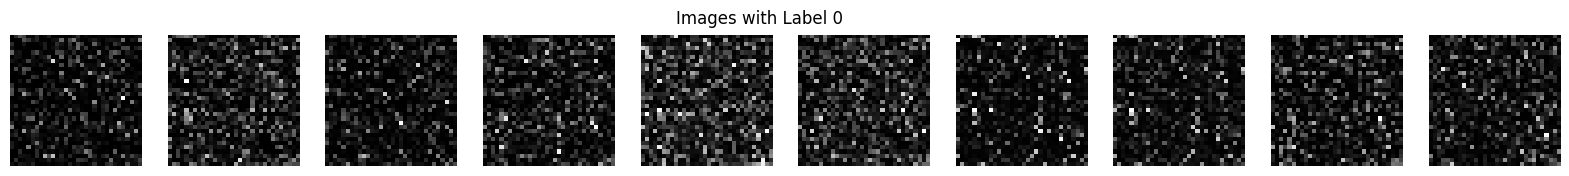

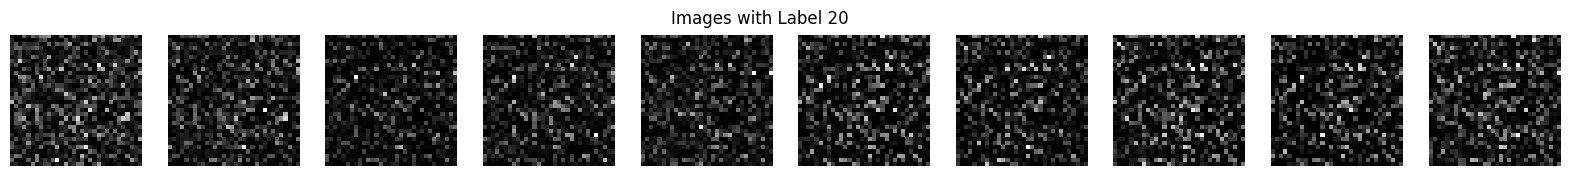

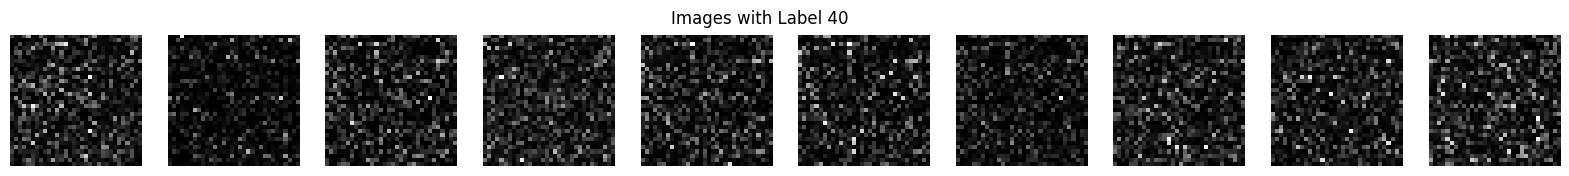

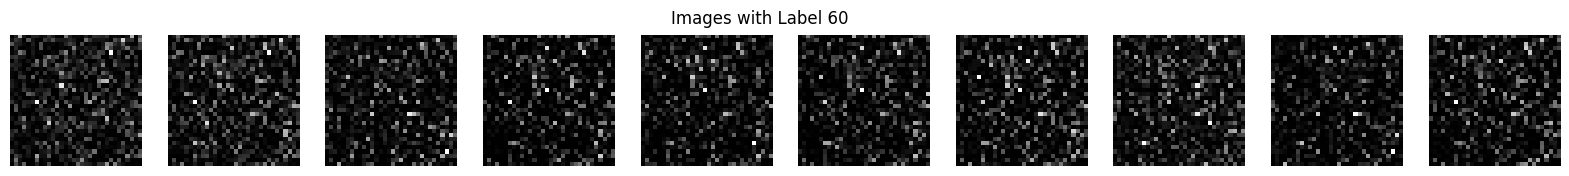

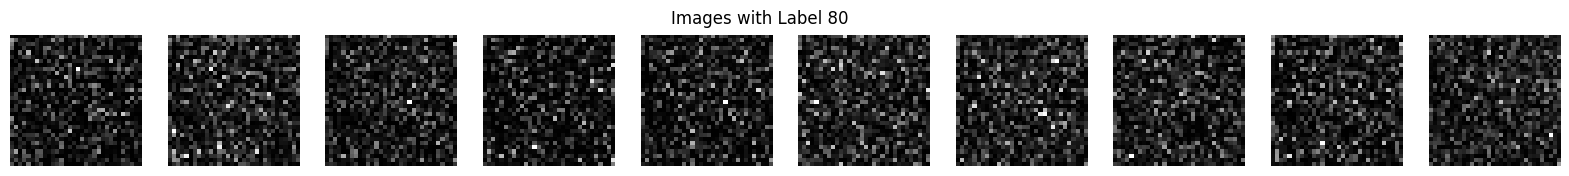

In [ ]:
# Function to display ten images with a specific label
def display_images(label, features, labels):
    plt.figure(figsize=(20, 2))
    images_label = features[labels[0] == label].values[:10]
    for i in range(10):
        plt.subplot(1, 10, i + 1)
        plt.imshow(images_label[i].reshape((32, 32)), cmap='gray')
        # image = images_label[i].reshape((32, 32))
        # image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
        # image_denoised = cv2.fastNlMeansDenoising(image, None, h=28, templateWindowSize=7, searchWindowSize=21)
        # plt.imshow(image_denoised, cmap='gray')
        plt.axis('off')
    plt.suptitle(f'Images with Label {label}', y=0.95)
    plt.show()

# Display ten images for label 0, 20, 40, 60, 80
for i in [0, 20, 40, 60, 80]:
    display_images(i, train_features, train_labels)

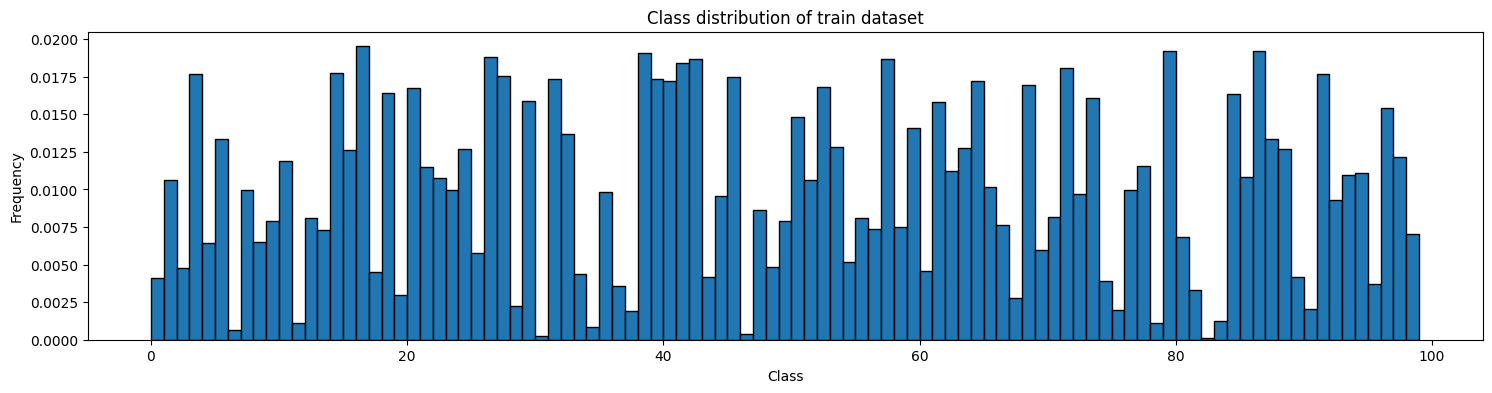

In [ ]:
# Plot the histogram of classes distribution.
data = train_labels[0].to_numpy()
plt.figure(figsize=(18, 4))
plt.hist(data, bins=range(min(data), max(data) + 1), edgecolor='black', density=True)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class distribution of train dataset')
plt.show()

Calculation of the correlation matrix shows that attributes `[974, 995, 995]` are highly correlated (with a threshold > 0.7).

### Study the training set

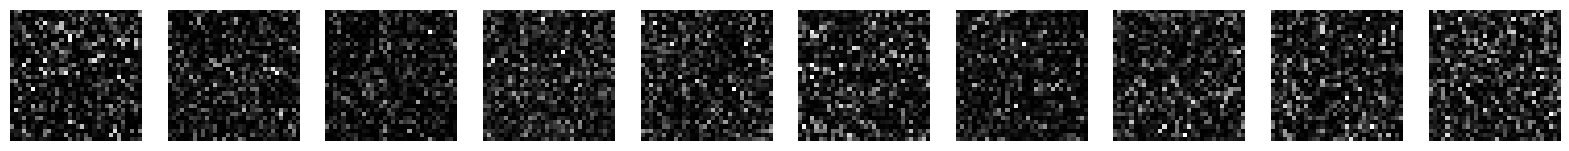

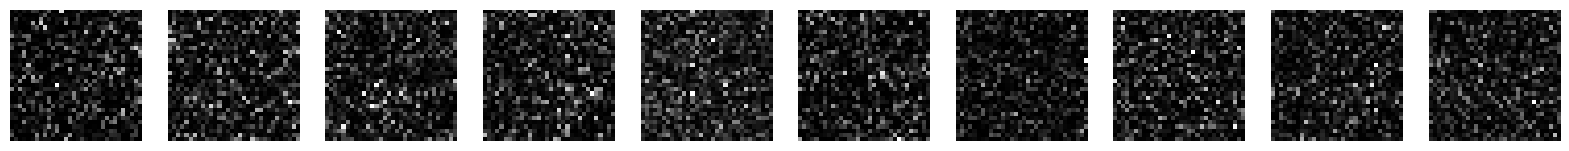

In [ ]:
# Function to display n rnadom images.
def display_random_images(n, features):
    plt.figure(figsize=(2*n, 2))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        idx = np.random.randint(len(features))
        plt.imshow(features.iloc[idx].to_numpy().reshape((32, 32)), cmap='gray')
        plt.axis('off')
    plt.show()

# Display random images.
display_random_images(10, test_features)
display_random_images(10, test_features)

In [ ]:
# Characteristics of the test features
test_features.describe()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.336281,0.394535,0.320883,0.327920,0.324702,0.352638,0.335184,0.342359,0.339358,0.427020,...,0.347985,0.369444,0.338862,0.342700,0.360893,0.396319,0.282112,0.445251,0.328294,0.351150
std,0.492287,0.583364,0.489361,0.457624,0.589024,0.516273,0.435183,0.426366,0.478804,0.632035,...,0.456652,0.461811,0.441195,0.460405,0.479185,0.513356,0.389170,0.595597,0.463388,0.526666
min,-0.218800,-0.015910,-0.159900,-0.021710,-0.010320,-0.015290,-0.015760,-0.070900,-0.117200,-0.022280,...,-0.022660,-0.184100,-0.134300,-0.020900,-0.011870,-0.022900,-0.214000,-0.019700,-0.055180,-0.027740
25%,0.011044,0.009793,0.005884,0.022387,0.001508,0.026375,0.038437,0.036730,0.018125,0.009299,...,0.031415,0.038797,0.036085,0.028230,0.034865,0.043850,0.015865,0.028670,0.017955,-0.003430
50%,0.135650,0.156700,0.115970,0.156600,0.107330,0.171350,0.173400,0.179800,0.153950,0.171050,...,0.176400,0.201000,0.179700,0.162550,0.189350,0.213900,0.127100,0.215250,0.135050,0.112665
75%,0.467350,0.532000,0.432925,0.443925,0.414300,0.481875,0.454700,0.497600,0.464400,0.588100,...,0.486375,0.528550,0.480275,0.477575,0.488300,0.545550,0.399250,0.637000,0.453400,0.484700
max,4.170000,6.140000,3.768000,4.316000,12.690000,8.945000,3.475000,3.290000,5.836000,7.203000,...,3.980000,4.043000,4.330000,3.570000,4.832000,5.426000,3.840000,5.094000,4.210000,4.460000


### Compare the training set and the test set

We plot the graphs of the average, maximum and minimum of each feature.

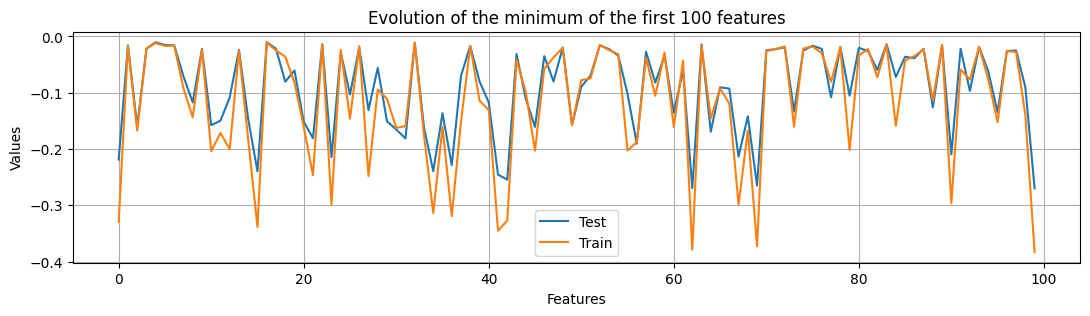

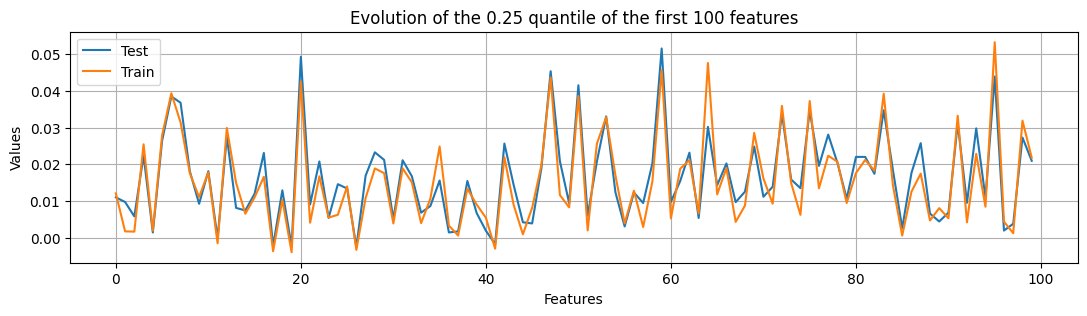

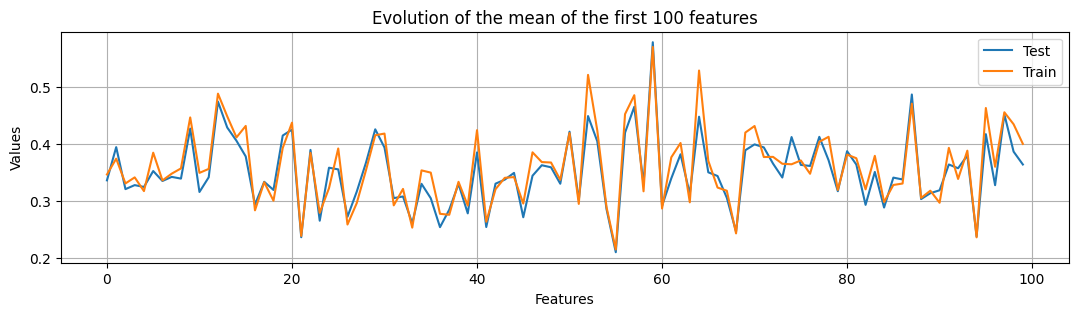

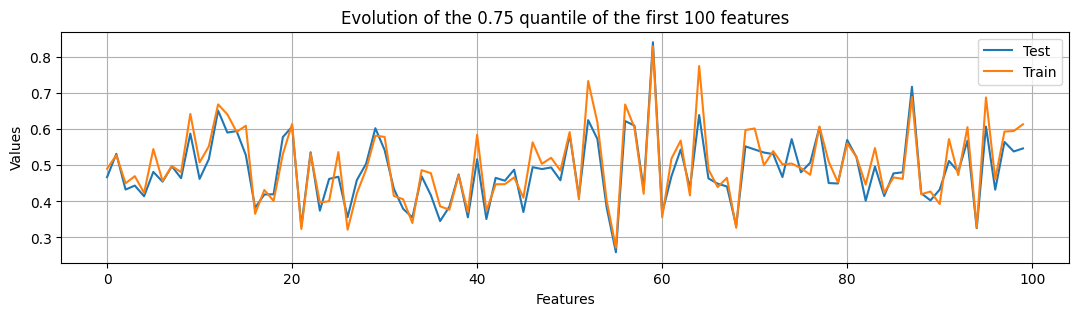

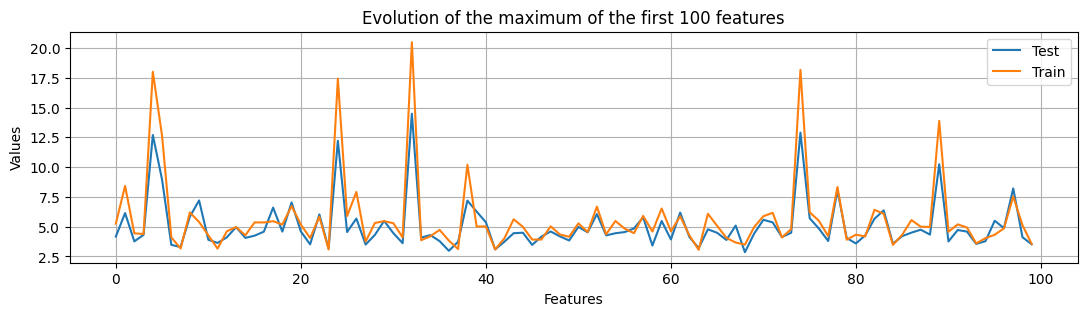

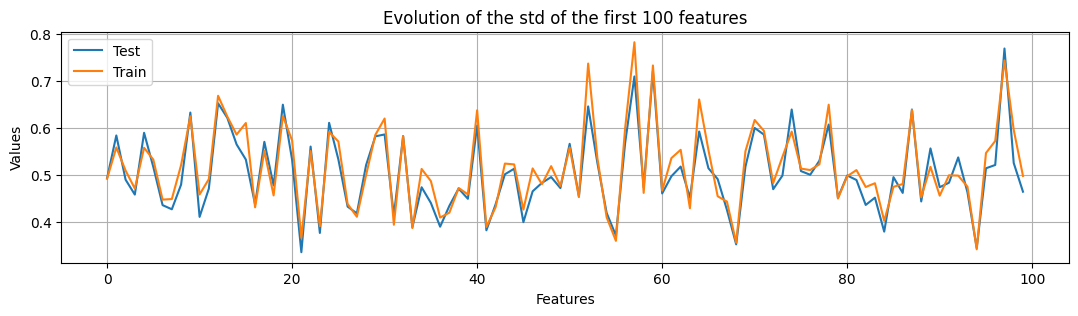

In [ ]:
# Plot the minimum along the features.
plt.figure(figsize=(13, 3))
test_features.iloc[:, :100].min().plot(kind='line', linestyle='-', label='Test')
train_features.iloc[:, :100].min().plot(kind='line', linestyle='-', label='Train')
plt.title('Evolution of the minimum of the first 100 features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# Plot the first quartile along the features.
plt.figure(figsize=(13, 3))
test_features.iloc[:, :100].quantile(0.25).plot(kind='line', linestyle='-', label='Test')
train_features.iloc[:, :100].quantile(0.25).plot(kind='line', linestyle='-', label='Train')
plt.title('Evolution of the 0.25 quantile of the first 100 features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# Plot the mean along the features.
plt.figure(figsize=(13, 3))
test_features.iloc[:, :100].mean().plot(kind='line', linestyle='-', label='Test')
train_features.iloc[:, :100].mean().plot(kind='line', linestyle='-', label='Train')
plt.title('Evolution of the mean of the first 100 features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# Plot the third quartile along the features.
plt.figure(figsize=(13, 3))
test_features.iloc[:, :100].quantile(0.75).plot(kind='line', linestyle='-', label='Test')
train_features.iloc[:, :100].quantile(0.75).plot(kind='line', linestyle='-', label='Train')
plt.title('Evolution of the 0.75 quantile of the first 100 features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# Plot the maximum along the features.
plt.figure(figsize=(13, 3))
test_features.iloc[:, :100].max().plot(kind='line', linestyle='-', label='Test')
train_features.iloc[:, :100].max().plot(kind='line', linestyle='-', label='Train')
plt.title('Evolution of the maximum of the first 100 features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

# Plot the std along the features.
plt.figure(figsize=(13, 3))
test_features.iloc[:, :100].std().plot(kind='line', linestyle='-', label='Test')
train_features.iloc[:, :100].std().plot(kind='line', linestyle='-', label='Train')
plt.title('Evolution of the std of the first 100 features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Coordinate of the max train features value.
x_max, y_max = np.unravel_index(np.argmax(train_features), train_features.shape)
print(f"Coordinate of the max train features value : x_max={x_max}, y_max={y_max}")

Coordinate of the max train features value : x_max=7926, y_max=32


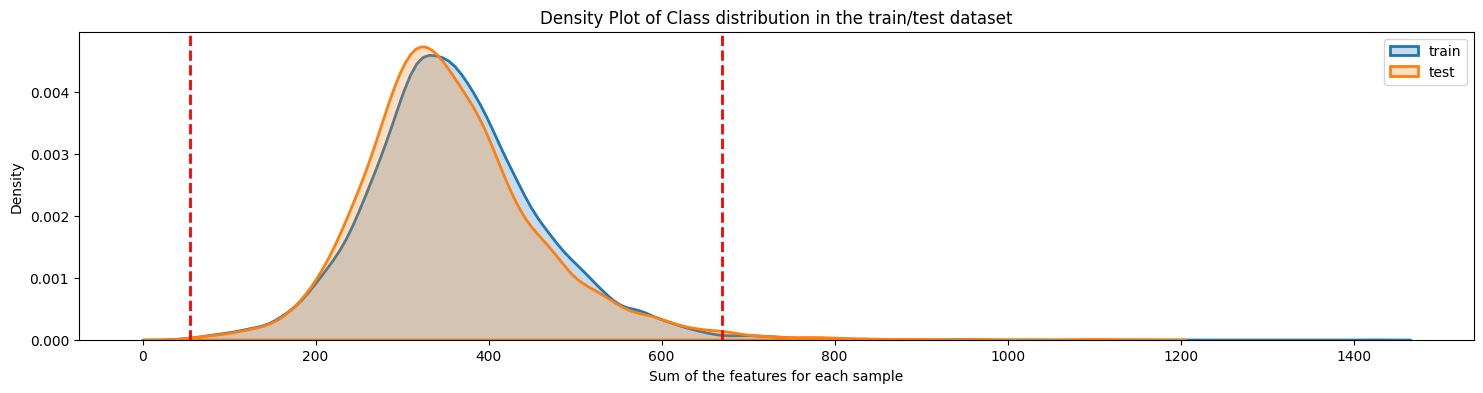

In [ ]:
# Making the sum of each sample on the features.
data_train_sum_on_features = np.sum(train_features.to_numpy(), axis=1)
data_test_sum_on_features = np.sum(test_features.to_numpy(), axis=1)

# Compute outliers line with std criteria.
mean_value = np.mean(data_train_sum_on_features)
std_dev = np.std(data_train_sum_on_features)
alpha = 3

# Plotting density of the result sommation.
plt.figure(figsize=(18, 4))
sns.kdeplot(data_train_sum_on_features, fill=True, linewidth=2, label='train')
sns.kdeplot(data_test_sum_on_features, fill=True, linewidth=2, label='test')
plt.axvline(mean_value - alpha * std_dev, color='red', linestyle='dashed', linewidth=2)
plt.axvline(mean_value + alpha * std_dev, color='red', linestyle='dashed', linewidth=2)
plt.xlabel('Sum of the features for each sample')
plt.ylabel('Density')
plt.title('Density Plot of Class distribution in the train/test dataset')
plt.legend()
plt.show()

----
## **Preparing the Data**

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.2, random_state=seed)
X_train, X_val = X_train.to_numpy(), X_val.to_numpy()
y_train, y_val = y_train.values.ravel(), y_val.values.ravel()

We try to transform the data with some classic transformer
- **StandardScaler**, standardizes data by adjusting the mean to zero and the standard deviation to one.
- **QuantileTransformer**, transforms data to follow a specified quantile-based distribution, typically uniform.

We try to work too with a **Principal Component Analysis (PCA)** but the results are not satisfactory.

Considering that this is an image with **Gaussian noise**, we tried to remove this noise using the OpenCV library.

These solutions didn't produce the best results on Kaggle and can be time-consuming. We have therefore removed them from this notebook.


### Remove outliers.

In [ ]:
# Get index of outliers.
outlier_lim_down = mean_value - alpha * std_dev
outlier_lim_up = mean_value + alpha * std_dev
no_outliers_idx = ((data_train_sum_on_features > outlier_lim_down) * (data_train_sum_on_features < outlier_lim_up)).astype(bool)
outliers_idx = (1 - no_outliers_idx).astype(bool)
print(f"Number of outliers     : {sum(outliers_idx)}")
print(f"Percentage of outliers : {round(sum(outliers_idx) / len(outliers_idx) * 100, 1)}%")

Number of outliers     : 220
Percentage of outliers : 0.9%


In [ ]:
train_features_rmo = train_features.iloc[no_outliers_idx]
train_labels_rmo = train_labels.iloc[no_outliers_idx]
X_train_rmo, X_val_rmo, y_train_rmo, y_val_rmo = train_test_split(train_features_rmo, train_labels_rmo, test_size=0.2, random_state=seed)
X_train_rmo, X_val_rmo = X_train_rmo.to_numpy(), X_val_rmo.to_numpy()
y_train_rmo, y_val_rmo = y_train_rmo.values.ravel(), y_val_rmo.values.ravel()

----
## **Evaluating Model Performance**

### Function to evaluate performance of a Scikit Learn Model.

In [ ]:
def train_predict(model, sample_size, X_train, y_train, X_test, y_test):
    '''
    inputs:
       - model: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''

    results = {}

    # Train the model with the training set.
    start = time.time()
    model.fit(X_train[:sample_size], y_train[:sample_size])
    end = time.time()
    results['train_time'] = end-start

    # Predict the X_test with the trained model.
    start = time.time()
    predictions_test = model.predict(X_test)
    predictions_train = model.predict(X_train[:sample_size])
    end = time.time()
    results['pred_time'] = end-start

    # Compute accuracy.
    results['acc_train'] = accuracy_score(y_train[:sample_size], predictions_train)
    results['acc_test'] = accuracy_score(y_test, predictions_test)

    # Compute F-score weight.
    results['f_train'] = f1_score(y_train[:sample_size], predictions_train, average='weighted')
    results['f_test'] = f1_score(y_test, predictions_test, average='weighted')

    # Success
    print("\nResults for {} with {} as sample size :".format(model.__class__.__name__, sample_size))
    if len(X_test) > sample_size:
        print("/!\\ Warning : The X_test size is bigger than the sample size /!\\")
    print("Training Time: {:.4f}s".format(results['train_time']))
    print("Prediction Time: {:.4f}s".format(results['pred_time']))
    print("Accuracy on Training Data: {:.4f}".format(results['acc_train']))
    print("Accuracy on Validation Data: {:.4f}".format(results['acc_test']))
    print("F-score on Training Data: {:.4f}".format(results['f_train']))
    print("F-score on Validation Data: {:.4f}".format(results['f_test']))
    print("-------------------------------")

    # Return the results
    return results

### Function to evaluate performance of PyTorch Neural Network.

In [ ]:
def train_predict_nn(model_nn, sample_size, X_train, y_train, X_test, y_test, lr=0.001, epochs=200):
    '''
    inputs:
       - model_nn: the neural network to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''

    results = {}

    # Convert data to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long)

    # Instanciate optimizer and loss function
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model_nn.parameters(), lr=0.001)

    # Train the neural network
    start_time = time.time()
    for epoch in tqdm(range(epochs)):
        optimizer.zero_grad()
        outputs = model_nn(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()
    end_time = time.time()
    results['train_time'] = end_time - start_time

    # Make predictions on the validation set
    start_time = time.time()
    with torch.no_grad():
        outputs_test = model_nn(X_test_tensor)
        _, y_pred_test_nn = torch.max(outputs_test, 1)
    end_time = time.time()
    results['pred_time'] = end_time - start_time

    # Evaluate accuracy and F1 score
    results['acc_train'] = accuracy_score(y_train, torch.argmax(outputs, dim=1))
    results['acc_test'] = accuracy_score(y_test, y_pred_test_nn)
    results['f_train'] = f1_score(y_train, torch.argmax(outputs, dim=1), average='weighted')
    results['f_test'] = f1_score(y_test, y_pred_test_nn, average='weighted')

    # Success
    print("\nResults for {} with {} as sample size :".format(model_nn.__class__.__name__, sample_size))
    print("Training Time: {:.4f}s".format(results['train_time']))
    print("Prediction Time: {:.4f}s".format(results['pred_time']))
    print("Accuracy on Training Data: {:.4f}".format(results['acc_train']))
    print("Accuracy on Validation Data: {:.4f}".format(results['acc_test']))
    print("F-score on Training Data: {:.4f}".format(results['f_train']))
    print("F-score on Validation Data: {:.4f}".format(results['f_test']))
    print("-------------------------------")

    # Return the results
    return results

### SVC algorithm.

In [ ]:
clf_svc = SVC(random_state=0)
results_svc = train_predict(clf_svc, int(len(X_train)), X_train, y_train, X_val, y_val)


Results for SVC with 20412 as sample size :
Training Time: 66.8580s
Prediction Time: 620.2796s
Accuracy on Training Data: 0.9672
Accuracy on Validation Data: 0.9291
F-score on Training Data: 0.9669
F-score on Validation Data: 0.9273
-------------------------------


In [ ]:
# Without outliers.
clf_svc_rmo = SVC()
results_svc_rmo = train_predict(clf_svc_rmo, int(len(X_train_rmo)), X_train_rmo, y_train_rmo, X_val_rmo, y_val_rmo)


Results for SVC with 20236 as sample size :
Training Time: 64.7254s
Prediction Time: 562.3815s
Accuracy on Training Data: 0.9692
Accuracy on Validation Data: 0.9330
F-score on Training Data: 0.9688
F-score on Validation Data: 0.9317
-------------------------------


In [ ]:
# SVC optimize with the cluster.
# Best Parameters: {'C': 5.6, 'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}
clf_svc_opt = SVC(C=5.6, decision_function_shape='ovo', gamma='scale', kernel='rbf')
results_svc_opt = train_predict(clf_svc_opt, int(len(X_train)), X_train, y_train, X_val, y_val)


Results for SVC with 20412 as sample size :
Training Time: 55.4727s
Prediction Time: 510.9453s
Accuracy on Training Data: 0.9956
Accuracy on Validation Data: 0.9408
F-score on Training Data: 0.9956
F-score on Validation Data: 0.9400
-------------------------------


We have also tested on multiple parameters with the following algorithms: Logistic Regression, Decision Tree Classifier, Random Forest Classifier, K-Nearest Neighbors Classifier, Gradient Boosting Classifier, Bagging Classifier, and AdaBoost Classifier.

## **Neural Network with PyTorch.**

### Simple Neural Network.

In [ ]:
# Create a simple neural network class
class SimpleNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        return x

In [ ]:
# Instantiate and evaluate the model.
sample_size = len(X_train)
model_simple_nn = SimpleNN(input_size=X_train.shape[1], num_classes=num_classes)
result_model_simple_nn = train_predict_nn(model_simple_nn, sample_size, X_train, y_train, X_val, y_val, epochs=200)

100%|██████████| 200/200 [01:10<00:00,  2.85it/s]


Results for SimpleNN with 20412 as sample size :
Training Time: 70.1945s
Prediction Time: 0.0722s
Accuracy on Training Data: 0.9640
Accuracy on Validation Data: 0.9310
F-score on Training Data: 0.9639
F-score on Validation Data: 0.9296
-------------------------------


In [ ]:
# Without outliers.
sample_size = len(X_train_rmo)
model_simple_nn_rmo = SimpleNN(input_size=X_train_rmo.shape[1], num_classes=num_classes)
result_model_simple_nn_rmo = train_predict_nn(model_simple_nn_rmo, sample_size, X_train_rmo, y_train_rmo, X_val_rmo, y_val_rmo, epochs=200)

100%|██████████| 200/200 [01:07<00:00,  2.97it/s]


Results for SimpleNN with 20236 as sample size :
Training Time: 67.2419s
Prediction Time: 0.0660s
Accuracy on Training Data: 0.9650
Accuracy on Validation Data: 0.9332
F-score on Training Data: 0.9649
F-score on Validation Data: 0.9321
-------------------------------


We also tried to build an improved neural network with a higher number of layers and/or a higher number of neurons, but the most interesting results were obtained with a simple neural network.

A solution was tested with a convional neural network using TensorFlow. However, we were limited by a lack of knowledge about this type of model.

----
## **Compute Test features**

Here, we calculate test labels only with the SVC algorithm (**which is our final submission and give us the best score on Kaggle**) and with SimpleNN. We compare the two solutions.

We had the idea of forcing the class distribution of the test dataset to be identical to the class disbrution of the train dataset. To do this, we put this problem in the form of an optimization problem. Using the Pulp library, we coded a function taking as input a proba_matrix of size (n_sample x n_classes) containing the probability of each example obtaining each class obtained using the neural network and a vector representing the distribution to be copied. The aim was to maximize the probability sum of the selected classes. This solution gave very poor results on Kaggle.

In [ ]:
# --- For SVC algorithm ---

# 1. Preprocessing.
X_tot = train_features.to_numpy()
y_tot = train_labels.to_numpy().ravel()

# 2. Train the model.
model = SVC(random_state=0)
model.fit(X_tot, y_tot)

# 3. Predict the model.
y_pred_svc = model.predict(test_features.to_numpy())

In [ ]:
# --- For SimpleNN ---

# 1. Preprocessing.
X_tot = train_features.to_numpy()
y_tot = train_labels.to_numpy().ravel()

# 2. Train the model.
model_simple_nn = SimpleNN(input_size=X_tot.shape[1], num_classes=num_classes)
train_predict_nn(model_simple_nn, len(X_tot), X_tot, y_tot, X_val, y_val, epochs=200)

# 3. Predict the model.
X_test_tensor = torch.tensor(test_features.to_numpy(), dtype=torch.float32)
with torch.no_grad():
    outputs_test = model_simple_nn_rmo(X_test_tensor)
    _, y_pred_nn = torch.max(outputs_test, 1)
y_pred_nn = y_pred_nn.numpy()

100%|██████████| 200/200 [01:50<00:00,  1.81it/s]



Results for SimpleNN with 25515 as sample size :
Training Time: 110.6148s
Prediction Time: 0.0353s
Accuracy on Training Data: 0.9610
Accuracy on Validation Data: 0.9596
F-score on Training Data: 0.9607
F-score on Validation Data: 0.9590
-------------------------------


In [ ]:
# Difference between the SVC result and SimpleNN result.
print(f"% of difference between prediction with SVC and NN : {round((1 - sum(y_pred_svc == y_pred_nn) / len(y_pred_svc)) * 100, 3)}")
print(f"Number of difference between prediction with SVC and NN : {len(y_pred_svc) - sum(y_pred_svc == y_pred_nn)}")

% of difference between prediction with SVC and NN : 13.07
Number of difference between prediction with SVC and NN : 1307


----
## **Final Submission**

The final submission is made with the SVC algorithm with default parameters. The SVC result is far from the results we obtain on the validation data. Many data processing and algorithms give better results. However, SVC algorithm with default parameters is the solution that gives the best results on Kaggle.

In [ ]:
# Transform to dataframe
df_y_pred_svc = pd.DataFrame(y_pred_svc.astype(int), columns=['TARGET']).rename_axis("ID").reset_index()
# Save
# path = "./results/SVC_result.csv"
# df_y_pred_svc.to_csv(path, index=False)

<!-- END QUESTION -->

